In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

### FINAL RESULTS:
- Model Chosen: Light GBM
- R^2: 0.3791 (stdv = 0.0098)
- Hyper-parameters: lr: 0.1, depth: 7, est: 100, leaves: 120

## Imports

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import shap
from sklearn.metrics import r2_score
from tabulate import tabulate

<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

### Summary of Findings:
- Columns with missing values ('name', 'host_name', 'last_review', 'reviews_per_month') will likely require imputation.
- Features with a wide values ('price', 'minimum_nights', 'number_of_reviews', etc.) might require normalization or standardization.
- 'neighbourhood_group' and 'room_type' have low number of unique values, making them good candidates for one-hot encoding.
- 'name', 'host_name', 'neighbourhood', and 'last_review' have many distinc categories and might require other forms of processing (e.g., feature extraction), or might even be dropped (e.g., will host name really help us with anything?).
- Key Features for Prediction: The room_type, price, neighbourhood_group, and availability_365 are LIKELY determinants of a listing's popularity

In [3]:
# Load the dataset
df = pd.read_csv('data/AB_NYC_2019.csv')

# Display first few rows
print(df.head())

# Check shape
print("\nShape of the dataset:", df.shape)

# Display data types
print("\nColumn names and data types:")
print(df.dtypes)

# Check missing values
print("\nMissing values for each column:")
print(df.isnull().sum())

# Display basic stats
print("\nBasic statistics (numerical):")
print(df.describe())

# Checking unique values 
categorical_columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

for col in categorical_columns:
    print(f"Unique values in '{col}' column:")
    print(df[col].unique())
    print()

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.6, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

### OBSERVATIONS FROM EDA:
1. Histogram for 'price': prices are right skewed (with a few outliers). We will likely have to consider the outliers when training the model (make sure we dont overfit the data)
2. Bar Chart (reviews_per_month vs neightbourhood): it seems like there is a correlation between the number of reviews per month and the neighbourhood group. In particular, state island, queens, and bronxs all have higher average number of reviews than other neighbourhoods. This will likely be an important feature in training our model (w/ high predictive power). 
3. Scatter plot (reviews_per_month and price): at high prices, there is a low number of reviews. 
4. Box Plot (reviews_per_month and property type): it seems like private rooms have a higher number of reviews per month than the other categories. However, when we consider the "error bars", that difference becomes "more negligent." I wonder about the predictive power of this feature.
5. Reviews per month (description): The wide range between the min and max values, combined with the standard deviation and percentiles, suggests there might be outliers. Due to the presence of outliers, using Mean Absolute Error (MAE) might be better than other evaluation metrics (R^2 for example is known for being highly impacted by outliers in regression models)
6. Correlation (price and reviews_per_month): There is a very week correlation between prices and reviews per month (even though intuitively there should be a strong correlation --> more expensive properties = less guests = less reviews). Might be more useful to create price bins instead.
7. Percentile (reviews per month): highlights median (0.71), provides context for model predictions (what a typical number looks like, is our model performing something similar?)
### SUMMARY + NEXT STEPS:
- Several features have missing values, specifically 'last_review' and the target 'reviews_per_month'.
- Data Preprocessing: handling of missing values, potential outlier management for the target variable, and encoding categorical variables.
- One-hot Encode neighbourhood_group and room_type columns to convert categorical data into a ML format.
- Convert last_review to "Days Since Last Review", difference between a given date and the most recent review
- cale price and reviews_per_month using Min-Max Scaling to ensure they're on similar scales for ML algorithms.

In [5]:
sns.set_theme()

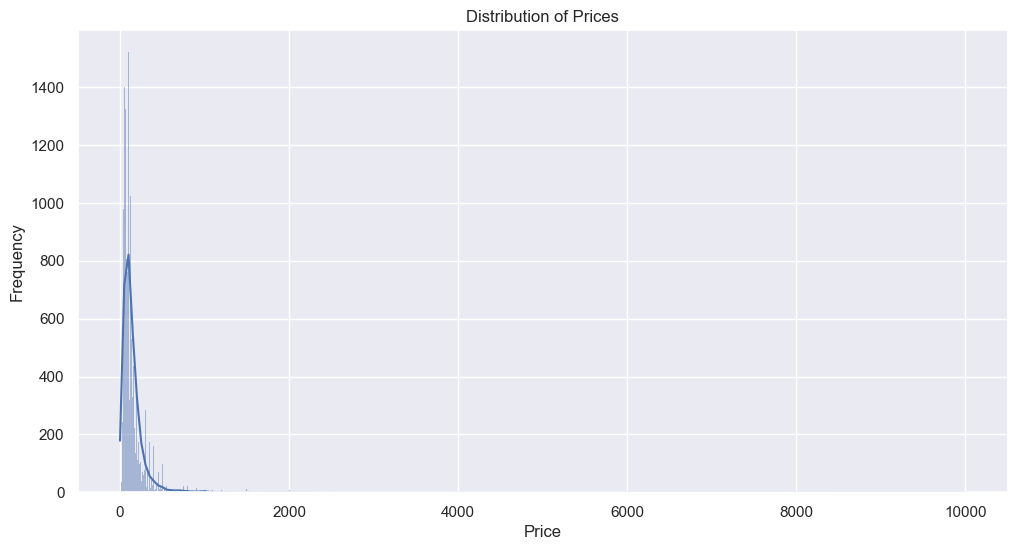

In [6]:
# 1. Histogram for 'price'
plt.figure(figsize=(12, 6))
sns.histplot(train_df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

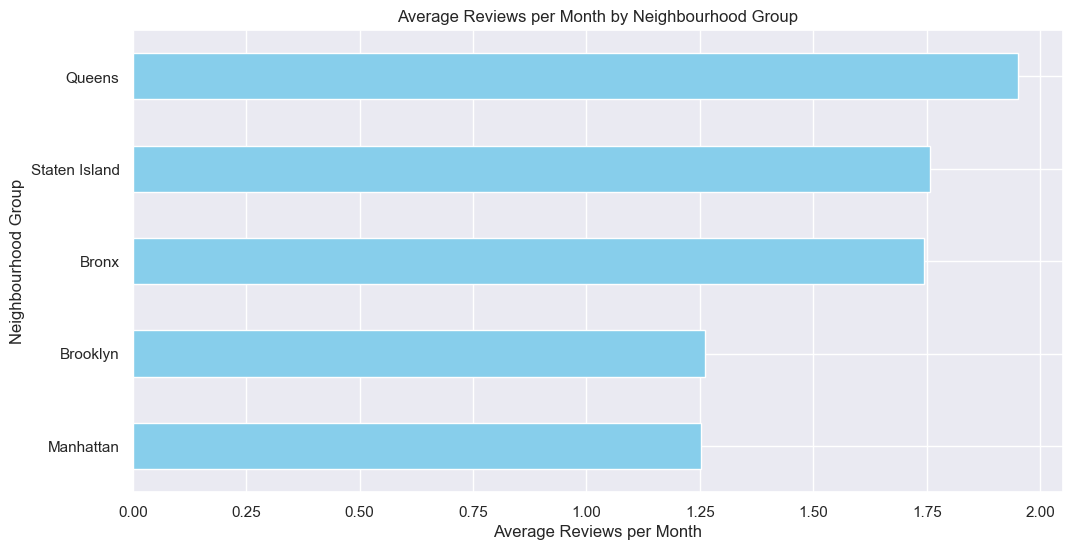

In [7]:
# 2. Bar chart: reviews_per_month for neighbourhood_group
plt.figure(figsize=(12, 6))
grouped = train_df.groupby('neighbourhood_group')['reviews_per_month'].mean().sort_values()
grouped.plot(kind='barh', color='skyblue')
plt.title('Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Neighbourhood Group')
plt.show()

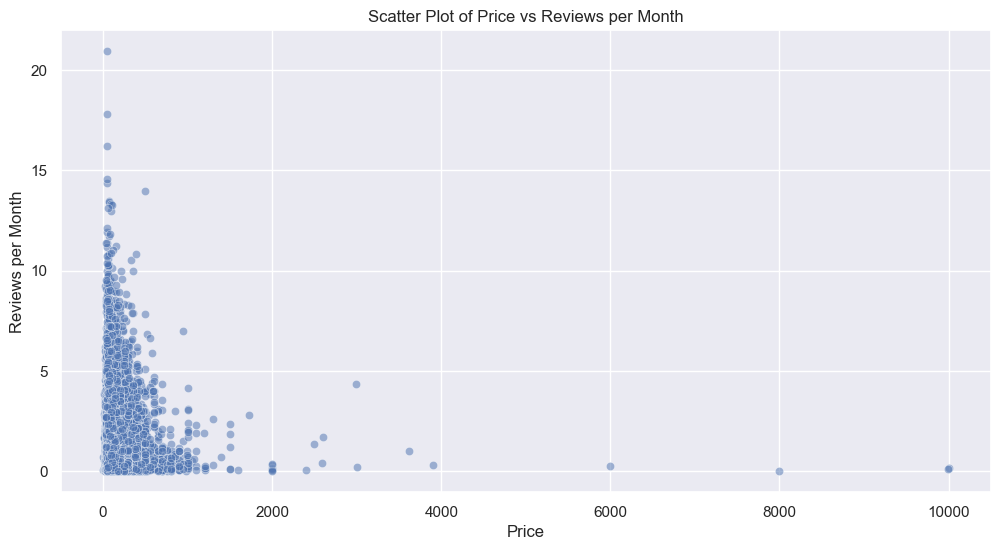

In [8]:
# 3. Scatter plot: 'price' and 'reviews_per_month'.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df, x='price', y='reviews_per_month', alpha=0.5)
plt.title('Scatter Plot of Price vs Reviews per Month')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.show()

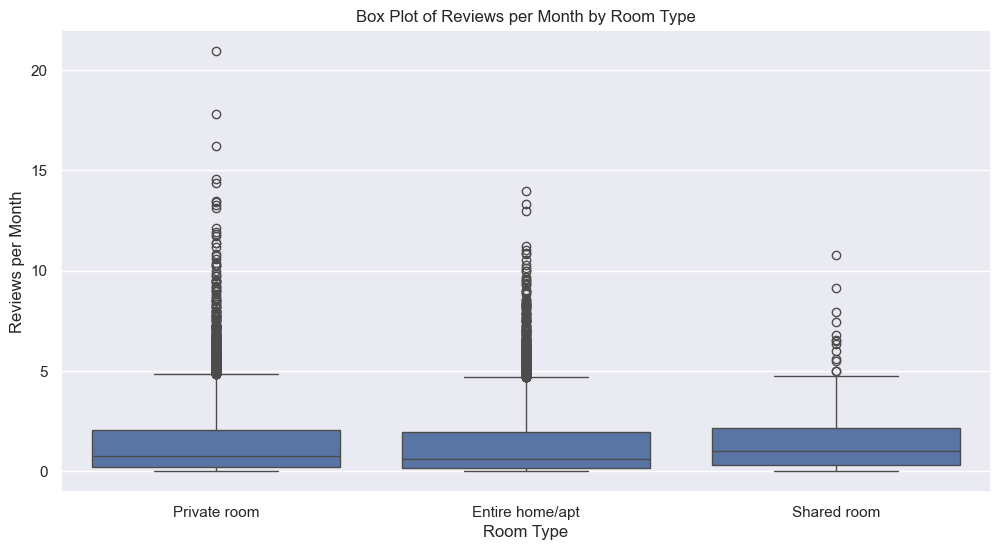

In [9]:
# 4. Box plot: 'reviews_per_month' across 'room_type'.
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='room_type', y='reviews_per_month')
plt.title('Box Plot of Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Reviews per Month')
plt.show()

In [10]:
print(train_df['reviews_per_month'].describe())

count    15614.000000
mean         1.355881
std          1.640878
min          0.010000
25%          0.190000
50%          0.700000
75%          2.000000
max         20.940000
Name: reviews_per_month, dtype: float64


In [11]:
correlation = train_df[['price', 'reviews_per_month']].corr().iloc[0, 1]
print(f"Correlation between Price and Reviews per Month: {correlation}")

Correlation between Price and Reviews per Month: -0.03144555645129819


In [12]:
percentiles = train_df['reviews_per_month'].quantile([0.25, 0.5, 0.75])
print(f"25th, 50th, and 75th percentiles of reviews per month:\n{percentiles}")

25th, 50th, and 75th percentiles of reviews per month:
0.25    0.19
0.50    0.70
0.75    2.00
Name: reviews_per_month, dtype: float64


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

### REASON FOR CREATING PRICE BINS:
- Binning can help in managing outliers by grouping extreme values into broader categories, which can make the model less sensitive to extreme values and improve its generalization abilities.
- By reducing the effect of minor fluctuations in prices and focusing on broader price ranges, binned prices can sometimes lead to improved model performance

In [13]:
# 1. Price Bins
def price_binning(price):
    if price < 0.33:
        return "low"
    elif price < 0.67:
        return "medium"
    else:
        return "high"

train_df['price_bin'] = train_df['price'].apply(price_binning)
test_df['price_bin'] = test_df['price'].apply(price_binning)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

### FEATURES DROP:
Intuitevely we can drop these features since they do not have predictive power (e.g., having similar host IDs is just a matter of chance):
- **id**: numerical (int), drop since not predictive (unique identifiers for the listing)
- **name**: categorical (object), drop since not predictive (name of the listing)
- **host_id**: numerical (int), drop (unique identifier for the host)
- **host_name**: categorical (object), drop since not predictive (name of the owner)
- **number_of_reviews**: numerical (int), keep, drop

### FEATURES KEPT:
- **neighbourhood_group**: categorical, keep (might be predictive of price), one-hot encoding, no missing values
- **neighbourhood**: categorical, keep (specific location can be predictive), one-hot encoding, no missing values
- **latitude**: numerical (float), keep (location coordinate can be predictive), scaling, no missing values
- **longitude**: numerical (float), keep (location coordinate can be predictive), scaling, no missing values
- **room_type**: categorical, keep (type of room can be predictive of price), one-hot encoding, no missing values
- **price**: numerical (int), keep, scaling, no missing values
- **minimum_nights**: numerical (int), keep, scaling, no missing values
- **last_review**: date, potential drop (or derive features like days since last review), missing values
- **calculated_host_listings_count**: numerical (int), keep, scaling, no missing values
- **availability_365**: numerical (int), keep, scaling, no missing values
- **price_bin**: look above for explanation

We use scaling numerical values here since we are dealing with a linear model. For tree-based models, we wouldn't need to scale.

### TARGET:
TARGET:
- **reviews_per_month**: numerical (float), keep (shows frequency of reviews), NaN handling, MANY missing values (drop those examples with missing reviews_per_month).

### REMOVING NaN TARGET VALUES:
- Removing NaN in target variables ensures effective model training, as ML supervised learning algorithms require known outputs.
- NaN values introduce uncertainty, hindering the model’s ability to learn and generalize effectively.
- Imputation is not ideal because of the large number of missing target values, potentially introducing bias and affecting model integrity and performance.

In [14]:
# Drop columns
drop_columns = ['id', 'name', 'host_id', 'host_name', 'last_review']

# Train:
X_train = train_df.drop(columns=['reviews_per_month', 'number_of_reviews'] + drop_columns)
Y_train = train_df['reviews_per_month']

# Test:
X_test = test_df.drop(columns=['reviews_per_month', 'number_of_reviews'] + drop_columns)
Y_test = test_df['reviews_per_month']

# Define transformers
# Scaling
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical:
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Drop values where target is NA:
non_na_indices = Y_train.notna()
X_train_non_na = X_train[non_na_indices]
Y_train_non_na = Y_train[non_na_indices]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

### BASELINE MODEL RESULTS:
- At first glance it might look that the cv_mae produces a small erorr.
- But as shown above, we know that the values of average number of ratings are very low (so an error of 1.23 can indicate a very large discrepancy).
- This is also supported by the very low values of R^2.

In [15]:
# Pipeline: preprocesses the data and fits DummyRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('baseline', DummyRegressor(strategy="mean"))
])

# Compute the 10-fold cross-validated MAE for the baseline model
cv_mae = cross_val_score(pipeline, X_train_non_na, Y_train_non_na, scoring="neg_mean_absolute_error", cv=10)
cv_mae

array([-1.18940104, -1.22071963, -1.2076151 , -1.25037543, -1.20599614,
       -1.25430012, -1.2375886 , -1.27739115, -1.20676722, -1.20354442])

In [16]:
cv_r2 = cross_val_score(pipeline, X_train_non_na, Y_train_non_na, scoring='r2', cv=10)
cv_r2

array([-6.45849699e-04, -5.06571309e-04, -7.59557131e-04, -2.73366584e-04,
       -6.64503734e-05, -1.99222403e-03, -1.32147073e-04, -1.25947185e-03,
       -6.15124470e-04, -2.31475880e-03])

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

### LINEAR MODEL PERFORMANCE:
- The model is performing very poorly.
- Based on the cross-validation results, the Ridge regression model achieved a best average R^2 score of 0.0984 with a standard deviation of 0.0103.
- The optimal hyperparameter for this model was found to be an alpha of ~46.
- The graph visually corroborates the chosen alpha value, showing that for an alpha of 46.42, there is lower sign of overfitting than for other choices of alpha (given by the small difference in training and validation scores)

In [17]:
# Pre-Processor + Ridge Regression
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(random_state = 100))
])

# Range of Alpha:
param_grid = {
    'ridge__alpha': np.logspace(-10, 10, 13)  # alpha from 10^-10 to 10^10
}

# Setup GridSearchCV 
grid_search = GridSearchCV(pipeline_ridge, param_grid, cv=10, scoring='r2', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search.fit(X_train_non_na, Y_train_non_na)


best_score = grid_search.best_score_
best_params = grid_search.best_params_
std_dev = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

print(f"Best R^2 Score: {best_score:.4f}")
print(f"Standard Deviation of R^2 Score: {std_dev:.4f}")
print(f"Best Hyperparameters: {best_params}")

Best R^2 Score: 0.0984
Standard Deviation of R^2 Score: 0.0103
Best Hyperparameters: {'ridge__alpha': 46.415888336127914}


In [18]:
# Table of CV/STDV:
alphas = grid_search.cv_results_['param_ridge__alpha']
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

df = pd.DataFrame({
    'Alpha': alphas,
    'Mean R^2 Score': mean_scores,
    'Standard Deviation': std_scores
})

print(df)

              Alpha  Mean R^2 Score  Standard Deviation
0               0.0        0.092078            0.013261
1               0.0        0.092071            0.013267
2               0.0        0.092078            0.013264
3           0.00001        0.092074            0.013263
4          0.000464        0.092082            0.013261
5          0.021544        0.092201            0.013231
6               1.0        0.095006            0.012796
7         46.415888        0.098409            0.010345
8        2154.43469        0.076742            0.006307
9          100000.0        0.016912            0.001930
10   4641588.833613       -0.000385            0.000753
11  215443469.00319       -0.000846            0.000729
12    10000000000.0       -0.000856            0.000728


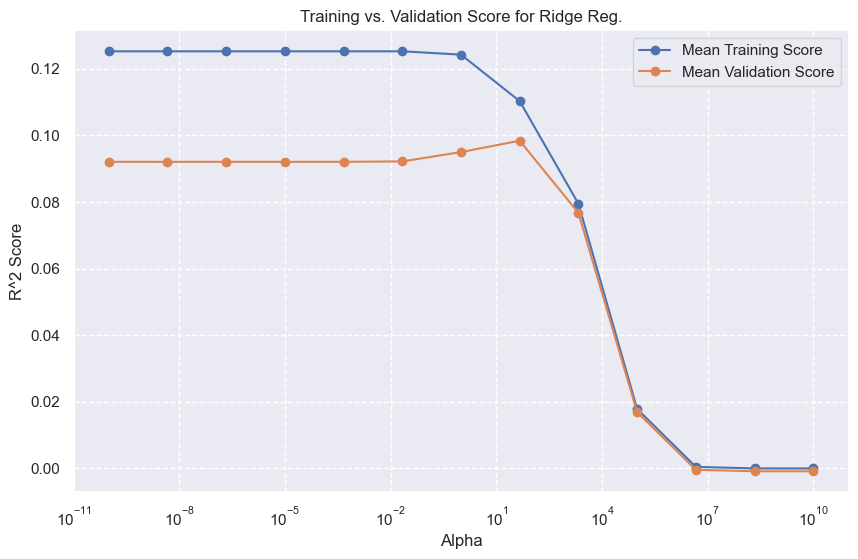

In [19]:
# Plotting Training vs. Validation Scores:
mean_train_scores = grid_search.cv_results_['mean_train_score']
mean_valid_scores = grid_search.cv_results_['mean_test_score']
alphas = grid_search.param_grid['ridge__alpha']

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_train_scores, label='Mean Training Score', marker='o')
plt.plot(alphas, mean_valid_scores, label='Mean Validation Score', marker='o')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Training vs. Validation Score for Ridge Reg.')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### k-NN
- **Best R^2 Score:** 0.1992
- **Standard Deviation:** 0.0146
- **Best Hyperparameters:** 29 neighbors
- **Observations:**
  - The k-NN model shows a moderate R^2 score, somewhat reasonable performance.
  - The difference between the training and validation R^2 scores suggests slight overfitting with the training scores being higher.

### Random Forest
- **Best R^2 Score:** 0.3531
- **Standard Deviation:** 0.0001
- **Best Hyperparameters:** 116 trees, max depth of 20
- **Observations:**
  - The Random Forest model has a higher R^2 score than k-NN, which means better predictive power.
  - Given the large difference between training and validation R^2 scores, there is a clear sign of overfitting; the model performs well on the training set but less so on unseen data.

### SVM with RBF Kernel
- **Best R^2 Score:** 0.2197
- **Standard Deviation:** 0.0019
- **Best Hyperparameters:** C value of 6.995
- **Observations:**
  - SVM with RBF kernel performs slightly better than k-NN but not as well as Random Forest.
  - The closer performance between training and validation scores suggests less overfitting compared to Random Forest.

### LightGBM
- **Best R^2 Score:** 0.3724
- **Standard Deviation:** 0.0043
- **Best Hyperparameters:** Learning rate of 0.1538, 106 trees, max depth of 7, 145 leaves
- **Observations:**
  - LightGBM offers the best R^2 score among all models tested, strong predictive capabilities.
  - However, there is a notable gap between training and validation R^2 scores, hinting at overfitting (model may be too complex for the data).
 
### Summary

In summary, while Random Forest and LightGBM show high training scores, they exhibit signs of overfitting, as evidenced by the large gap between training and validation scores. The SVM with RBF kernel has less discrepancy between training and validation, indicating better generalization, though its predictive power is not as high. The k-NN model, while being the simplest, provides moderate performance with signs of slight overfitting. 

### My Takeaway

I believe LightGBM is the best model despite its overfitting tendencies because it yields the highest validation R^2 scores, indicating higher predictive power. Its performance suggests that it could offer the most reliable forecasts on unseen data among the models I've tested.

In [20]:
def randomized_knn_search(hyper_start, hyper_end, num_iter, cv_folds):

    # Pre-Processor + k-NN
    pipeline_knn = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsRegressor())
    ])

    # Range of Neighbors:
    param_distributions = {
        'knn__n_neighbors': randint(hyper_start, hyper_end)  # Random integers between hyper_start and hyper_end
    }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline_knn, param_distributions=param_distributions,
        n_iter=num_iter, cv=cv_folds, scoring='r2', n_jobs=-1, random_state=123, 
        return_train_score=True
    )

    # Fit the model
    random_search.fit(X_train_non_na, Y_train_non_na)

    # Extract and print best results
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    std_dev = random_search.cv_results_['std_test_score'][random_search.best_index_]

    print(f"Best R^2 Score for k-NN: {best_score:.4f}")
    print(f"Standard Deviation of R^2 Score for k-NN: {std_dev:.4f}")
    print(f"Best Hyperparameters for k-NN: {best_params}")  

    # Table of Scores:
    df = pd.DataFrame({
        'Number of Neighbors': random_search.cv_results_['param_knn__n_neighbors'],
        'Mean Validation R^2 Score': random_search.cv_results_['mean_test_score'],
        'Mean Training R^2 Score': random_search.cv_results_['mean_train_score'],
        'Standard Deviation of Validation R^2 Score': random_search.cv_results_['std_test_score'] 
    })
    print(df)

randomized_knn_search(1, 31, 5, 4)
randomized_knn_search(31, 60, 5, 4)

Best R^2 Score for k-NN: 0.1992
Standard Deviation of R^2 Score for k-NN: 0.0146
Best Hyperparameters for k-NN: {'knn__n_neighbors': 29}
  Number of Neighbors  Mean Validation R^2 Score  Mean Training R^2 Score  \
0                  14                   0.194414                 0.301068   
1                   3                   0.070920                 0.545196   
2                  29                   0.199185                 0.250882   
3                   3                   0.070920                 0.545196   
4                   7                   0.163575                 0.379545   

   Standard Deviation of Validation R^2 Score  
0                                    0.018146  
1                                    0.042541  
2                                    0.014556  
3                                    0.042541  
4                                    0.030202  
Best R^2 Score for k-NN: 0.1992
Standard Deviation of R^2 Score for k-NN: 0.0156
Best Hyperparameters for k-NN: 

In [23]:
from sklearn.ensemble import RandomForestRegressor

def randomized_rf_search(n_start, n_end, depth_start, depth_end, num_iter, cv_folds):

    # Pre-Processor + k-NN
    pipeline_knn = Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestRegressor())
    ])

    # Param ranges:
    param_distributions = {
        'rf__n_estimators': randint(n_start, n_end),
        'rf__max_depth': randint(depth_start, depth_end)
    }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline_knn, param_distributions=param_distributions,
        n_iter=num_iter, cv=cv_folds, scoring='r2', n_jobs=-1, random_state=123, 
        return_train_score=True
    )

    # Fit the model
    random_search.fit(X_train_non_na, Y_train_non_na)

    # Extract and print best results
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    std_dev = random_search.cv_results_['std_test_score'][random_search.best_index_]

    print(f"Best R^2 Score for RandomForest: {best_score:.4f}")
    print(f"Standard Deviation of R^2 Score for RandomForest: {std_dev:.4f}")
    print(f"Best Hyperparameters for RandomForest: {best_params}")  

    # Prepare results DataFrame
    df = pd.DataFrame({
        'Number of Trees': random_search.cv_results_['param_rf__n_estimators'],
        'Max Depth': random_search.cv_results_['param_rf__max_depth'],
        'Mean Validation R^2 Score': random_search.cv_results_['mean_test_score'],
        'Mean Training R^2 Score': random_search.cv_results_['mean_train_score'],
        'Standard Deviation': random_search.cv_results_['std_test_score']
    })

    print(df)

randomized_rf_search(10, 200, 1, 50, 5, 2)
randomized_rf_search(200, 400, 51, 100, 5, 2)

Best R^2 Score for RandomForest: 0.3509
Standard Deviation of R^2 Score for RandomForest: 0.0012
Best Hyperparameters for RandomForest: {'rf__max_depth': 20, 'rf__n_estimators': 116}
  Number of Trees Max Depth  Mean Validation R^2 Score  \
0             136        46                   0.345539   
1             108         3                   0.286635   
2              27        39                   0.331992   
3             116        20                   0.350940   
4             106        23                   0.349060   

   Mean Training R^2 Score  Standard Deviation  
0                 0.906245            0.000107  
1                 0.297357            0.000090  
2                 0.895560            0.000993  
3                 0.820006            0.001240  
4                 0.860112            0.000734  
Best R^2 Score for RandomForest: 0.3503
Standard Deviation of R^2 Score for RandomForest: 0.0008
Best Hyperparameters for RandomForest: {'rf__max_depth': 53, 'rf__n_estimator

In [24]:
def randomized_svr_search(C_start, C_end, num_iter, cv_folds):

    # Pre-Processor + SVM with RBF
    pipeline_svm = Pipeline([
        ('preprocessor', preprocessor),
        ('svr', SVR(kernel='rbf'))
    ])

    # Param range for C:
    param_distributions = {
        'svr__C': uniform(C_start, C_end - C_start)
    }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline_svm, param_distributions=param_distributions,
        n_iter=num_iter, cv=cv_folds, scoring='r2', n_jobs=-1, random_state=123, 
        return_train_score=True
    )

    # Fit the model
    random_search.fit(X_train_non_na, Y_train_non_na)

    # Extract and print best results
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    std_dev = random_search.cv_results_['std_test_score'][random_search.best_index_]

    print(f"Best R^2 Score for SVM with RBF: {best_score:.4f}")
    print(f"Standard Deviation of R^2 Score for SVM with RBF: {std_dev:.4f}")
    print(f"Best Hyperparameters for SVM with RBF: {best_params}")  

    # Table of Scores:
    df = pd.DataFrame({
        'C Value': random_search.cv_results_['param_svr__C'],
        'Mean Validation R^2 Score': random_search.cv_results_['mean_test_score'],
        'Mean Training R^2 Score': random_search.cv_results_['mean_train_score'],
        'Standard Deviation': random_search.cv_results_['std_test_score']
    })

    print(df)

randomized_svr_search(0.1, 10, 3, 2)
randomized_svr_search(10, 100, 3, 2)

Best R^2 Score for SVM with RBF: 0.2197
Standard Deviation of R^2 Score for SVM with RBF: 0.0019
Best Hyperparameters for SVM with RBF: {'svr__C': 6.99504493741883}
    C Value  Mean Validation R^2 Score  Mean Training R^2 Score  \
0  6.995045                   0.219652                 0.297185   
1  2.932779                   0.208076                 0.260583   
2  2.345829                   0.203908                 0.250655   

   Standard Deviation  
0            0.001948  
1            0.001311  
2            0.000972  
Best R^2 Score for SVM with RBF: 0.2205
Standard Deviation of R^2 Score for SVM with RBF: 0.0040
Best Hyperparameters for SVM with RBF: {'svr__C': 30.41663082077828}
     C Value  Mean Validation R^2 Score  Mean Training R^2 Score  \
0  72.682227                   0.201954                 0.400685   
1   35.75254                   0.218257                 0.367859   
2  30.416631                   0.220505                 0.360739   

   Standard Deviation  
0      

In [25]:
# Assuming 'preprocessor' is a defined preprocessing pipeline

def randomized_lgbm_search(n_start, n_end, depth_start, depth_end, leaves_start, leaves_end, num_iter, cv_folds):

    pipeline_lgbm = Pipeline([
        ('preprocessor', preprocessor),
        ('lgbm', LGBMRegressor(verbose=-1, force_row_wise=True))
    ])

    # Param ranges:
    param_distributions = {
        'lgbm__n_estimators': randint(n_start, n_end),
        'lgbm__max_depth': randint(depth_start, depth_end),
        'lgbm__num_leaves': randint(leaves_start, leaves_end),  # Control the number of leaves
        'lgbm__learning_rate': uniform(0.01, 0.2)  # Adjust the range for learning rate as needed
    }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline_lgbm, param_distributions=param_distributions,
        n_iter=num_iter, cv=cv_folds, scoring='r2', n_jobs=-1, random_state=123, 
        return_train_score=True
    )

    # Fit the model
    random_search.fit(X_train_non_na, Y_train_non_na)

    # Extract and print best results
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    std_dev = random_search.cv_results_['std_test_score'][random_search.best_index_]

    print(f"Best R^2 Score for LightGBM: {best_score:.4f}")
    print(f"Standard Deviation of R^2 Score for LightGBM: {std_dev:.4f}")
    print(f"Best Hyperparameters for LightGBM: {best_params}")

    # Prepare results DataFrame
    df = pd.DataFrame({
        'Number of Trees': random_search.cv_results_['param_lgbm__n_estimators'],
        'Max Depth': random_search.cv_results_['param_lgbm__max_depth'],
        'Num Leaves': random_search.cv_results_['param_lgbm__num_leaves'],
        'Mean Validation R^2 Score': random_search.cv_results_['mean_test_score'],
        'Mean Training R^2 Score': random_search.cv_results_['mean_train_score'],
        'Standard Deviation': random_search.cv_results_['std_test_score']
    })

    print(df)

# Run the search twice
randomized_lgbm_search(10, 200, 1, 10, 32, 1024, 5, 3)
randomized_lgbm_search(100, 300, 5, 15, 64, 2048, 5, 3)

Best R^2 Score for LightGBM: 0.3724
Standard Deviation of R^2 Score for LightGBM: 0.0043
Best Hyperparameters for LightGBM: {'lgbm__learning_rate': 0.15383006203095462, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 106, 'lgbm__num_leaves': 145}
  Number of Trees Max Depth Num Leaves  Mean Validation R^2 Score  \
0             108         3        774                   0.363857   
1             106         7        145                   0.372352   
2             184         1        256                   0.299750   
3              88         4        285                   0.370789   
4              78         1        849                   0.292004   

   Mean Training R^2 Score  Standard Deviation  
0                 0.408789            0.003798  
1                 0.576613            0.004328  
2                 0.309069            0.004278  
3                 0.436867            0.003734  
4                 0.298725            0.004119  
Best R^2 Score for LightGBM: 0.3625
Standard Dev

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

### FEATURE SELECTION RESULTS:
- Before applying feature selection, the best R^2 score achieved by the LightGBM model was 0.3724 with a standard deviation of 0.0043.
- After incorporating feature selection into your pipeline, the best R^2 score observed was 0.3785, with a standard deviation of 0.0038. While there is a slight increase in the best R^2 score after feature selection, the change is not substantial.
- The slight improvement in the R^2 score could be within the margin of variability that can occur due to different splits of the data during cross-validation.
- From these results, we can infer that the feature selection process did not lead to a significant improvement in the model's performance.

In [26]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assume 'preprocessor' is defined as before
    ('feature_selection', SelectFromModel(LGBMRegressor(n_estimators=50, random_state=42))),
    ('model', LGBMRegressor(random_state=123, verbose=-1, force_col_wise=True))
])

# Fit the pipeline
pipeline.fit(X_train_non_na, Y_train_non_na)

# Extract the selector from the pipeline
selector = pipeline.named_steps['feature_selection']

# Run cross-validation
cv_scores = cross_val_score(pipeline, X_train_non_na, Y_train_non_na, cv=3, scoring='r2')

# Extract the results
best_score = cv_scores.max()
std_dev = cv_scores.std()

print(f"Best R^2 Score: {best_score:.4f}")
print(f"Standard Deviation of R^2 Score: {std_dev:.4f}")

# Prepare results DataFrame
df = pd.DataFrame({
    'Mean Validation R^2 Score': cv_scores.mean(),
    'Standard Deviation of Validation R^2 Score': std_dev,
}, index=[0])

print(df)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1299
[LightGBM] [Info] Number of data points in the train set: 15614, number of used features: 100
[LightGBM] [Info] Start training from score 1.355881
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 10409, number of used features: 84
[LightGBM] [Info] Start training from score 1.358716
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

### IMPORTANT NOTE:
_PLEASE CHECK Q8 FOR MORE HYPER-PARAMETER OPTIMIZATION! IT JUST MADE SENSE TO DO IT TOGETHER WITH MODEL TRAINING (INSTEAD OF JUST CHOOSING ONE RANDOM HYPER-PARAMETER VALUES FOR EACH MODEL). I WILL PERFORM A FEW MORE HERE AND COMPARE THE RESULTS WITH WHAT I FOUND IN Q8. SPECIFICALLY, I WILL GIVE A LOT OF ATTENTION TO THE "BEST" MODEL LIGHT GBM AND LEAST OVERFIT MODEL SVM w/ RBC_

### LIGHT GBM HYPERPARAMETER OPTM. (GRID SEARCH):

We choose the following values for GridSearch based on Random Search results from Q8:
- n_estimators (Number of Trees): Both of models had a number of estimators around 100 to 200. A grid search range of [50, 100, 150, 200, 250].
- max_depth: Best models had depths of 7. A grid search range of [5, 7, 9] to explore values around this.
- num_leaves: The best models had a number of leaves at 145 and 1830, which is quite a range. For the grid search, we will also look at a high range [120, 240, 480, 960].
- learning_rate: The learning rates of best models were around 0.15. I will use a range with slightly lower and higher values,[0.1, 0.15, 0.2].

Takeaways from results below:
- The best R^2 score achieved is 0.3791, with a standard deviation of 0.0098.
- The optimal hyperparameters for the best model are 100 trees, a max depth of 7, 120 leaves, and a learning rate of 0.1.
- However, multiple models with different combinations of 'Number of Trees', 'Max Depth', 'Num Leaves', and 'Learning Rate' share the same best validation score, which suggests that there may be multiple near-optimal solutions or the model is robust to these hyperparameters around this configuration.
- Increasing the 'Number of Trees' to 200 or 250 with the same depth didn't lead to a better R^2 score and 'Learning Rate' of 0.1 seems to be consistently in the best-performing models, suggesting that this might be the sweet spot for the learning rate for this dataset.
- There is a notable increase in the 'Standard Deviation' of the R^2 scores as the 'Number of Trees' and 'Learning Rate' increase. This might be an indicator of overfitting, where the model fits the training data well but fails to generalize to unseen data.
- Summary: the tuning suggests that for this particular LightGBM model and dataset, a moderate number of trees (around 100), combined with a max depth of 7, a moderate number of leaves (120-960), and a learning rate around 0.1, gives the most stable and highest R^2 performance. Further increases in complexity (more trees, leaves, or higher learning rates) do not necessarily result in improved cross-validated performance and may lead to overfitting.

### SVM w/ RBC HYPERPARAMETER OPTM. (GRID SEARCH):
I decided to also perform additional Grid Search hyper-parameter optimization. This is because SVM indicated the lowest evidence of overfitting (as outlined in Q8):
- I noticed that my SVM with RBF kernel performed best around a `C` value of approximately 30.42, where I got my highest R^2 score of 0.2205.
- However, I also saw decent performance at a lower `C` value near 6.995. 
- Considering these observations, I will start my grid search at a `C` value slightly lower than 6.995, around 5, to ensure that I haven't missed out on better-performing lower `C` values.
- I will also extend my search a bit beyond 30.42 but not too much higher since the performance dropped at `C` = 72.68. I want to avoid overfitting, so a reasonable upper limit for my `C` values in the grid search might be around 50.
- My grid for the next search will include values [5, 10, 15, 20, 25, 30, 35, 40].

Here are the results from below:
- The grid search for my SVM with RBF kernel achieved the best R^2 score of 0.2227 at a `C` value of 15, suggesting that this value helps to generalize well without overfitting.
- The standard deviation of R^2 scores across the folds was lowest at `C` = 15, at 0.0036, indicating more consistent performance compared to other values.
- Training scores increased with higher `C` values, but the validation scores did not improve correspondingly. This could mean that very high `C` values may start to fit unnecessary noise in the training data.

### SUMMARY:
- Light GBM still performs way better than SVM. 

In [27]:


# Define the model pipeline
pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),  # Assume 'preprocessor' is defined as before
    ('lgbm', LGBMRegressor(random_state=123, verbose=-1, force_row_wise=True))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'lgbm__n_estimators': [50, 100, 150, 200, 250],
    'lgbm__max_depth': [5, 7, 9],
    'lgbm__num_leaves': [120, 240, 480, 960],
    'lgbm__learning_rate': [0.1, 0.15, 0.2]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline_lgbm, param_grid=param_grid,
    cv=5, scoring='r2', n_jobs=-1, 
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train_non_na, Y_train_non_na)

# Extract and print best results
best_score = grid_search.best_score_
best_params = grid_search.best_params_
std_dev = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

print(f"Best R^2 Score for LightGBM: {best_score:.4f}")
print(f"Standard Deviation of R^2 Score for LightGBM: {std_dev:.4f}")
print(f"Best Hyperparameters for LightGBM: {best_params}")

# Prepare results DataFrame
df = pd.DataFrame({
    'Number of Trees': grid_search.cv_results_['param_lgbm__n_estimators'],
    'Max Depth': grid_search.cv_results_['param_lgbm__max_depth'],
    'Num Leaves': grid_search.cv_results_['param_lgbm__num_leaves'],
    'Learning Rate': grid_search.cv_results_['param_lgbm__learning_rate'],
    'Mean Validation R^2 Score': grid_search.cv_results_['mean_test_score'],
    'Mean Training R^2 Score': grid_search.cv_results_['mean_train_score'],
    'Standard Deviation': grid_search.cv_results_['std_test_score']
}).sort_values('Mean Validation R^2 Score', ascending=False)

print(df.head())

Best R^2 Score for LightGBM: 0.3791
Standard Deviation of R^2 Score for LightGBM: 0.0098
Best Hyperparameters for LightGBM: {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 100, 'lgbm__num_leaves': 120}
   Number of Trees Max Depth Num Leaves Learning Rate  \
27             100         7        960           0.1   
24             100         7        120           0.1   
26             100         7        480           0.1   
25             100         7        240           0.1   
30             150         7        480           0.1   

    Mean Validation R^2 Score  Mean Training R^2 Score  Standard Deviation  
27                   0.379119                 0.516255            0.009766  
24                   0.379119                 0.516255            0.009766  
26                   0.379119                 0.516255            0.009766  
25                   0.379119                 0.516255            0.009766  
30                   0.378122                

<!-- END QUESTION -->

<br><br>

In [28]:
print(df.to_string())

    Number of Trees Max Depth Num Leaves Learning Rate  Mean Validation R^2 Score  Mean Training R^2 Score  Standard Deviation
27              100         7        960           0.1                   0.379119                 0.516255            0.009766
24              100         7        120           0.1                   0.379119                 0.516255            0.009766
26              100         7        480           0.1                   0.379119                 0.516255            0.009766
25              100         7        240           0.1                   0.379119                 0.516255            0.009766
30              150         7        480           0.1                   0.378122                 0.554960            0.011728
29              150         7        240           0.1                   0.378122                 0.554960            0.011728
28              150         7        120           0.1                   0.378122                 0.554960     

In [29]:
# Pre-Processor + SVM with RBF
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svr__C': [5, 10, 15, 20, 25, 30, 35, 40]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline_svm, param_grid=param_grid,
    cv=2, scoring='r2', n_jobs=-1, 
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train_non_na, Y_train_non_na)

# Extract and print best results
best_score = grid_search.best_score_
best_params = grid_search.best_params_
std_dev = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

print(f"Best R^2 Score for GridSearchCV: {best_score:.4f}")
print(f"Standard Deviation of R^2 Score for GridSearchCV: {std_dev:.4f}")
print(f"Best Hyperparameters for GridSearchCV: {best_params}")

# Prepare results DataFrame
df = pd.DataFrame({
    'C value': grid_search.cv_results_['param_svr__C'],
    'Mean Validation R^2 Score': grid_search.cv_results_['mean_test_score'],
    'Mean Training R^2 Score': grid_search.cv_results_['mean_train_score'],
    'Standard Deviation': grid_search.cv_results_['std_test_score']
}).sort_values('Mean Validation R^2 Score', ascending=False)

print(df.head())

Best R^2 Score for GridSearchCV: 0.2227
Standard Deviation of R^2 Score for GridSearchCV: 0.0036
Best Hyperparameters for GridSearchCV: {'svr__C': 15}
  C value  Mean Validation R^2 Score  Mean Training R^2 Score  \
2      15                   0.222721                 0.330056   
3      20                   0.222363                 0.342183   
1      10                   0.221946                 0.312636   
4      25                   0.221864                 0.351974   
5      30                   0.220673                 0.360124   

   Standard Deviation  
2            0.003571  
3            0.004405  
1            0.002641  
4            0.004432  
5            0.004020  


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

### Initial Approach:
- The preprocessed features, initially in a sparse matrix format, are converted to a dense numpy array format to be compatible with the SHAP. 
- A SHAP summary plot is generated to visualize the distribution of SHAP values for each feature

### Shap Summary Plot:
- availability_365 has a wide spread of SHAP values and mostly contributes positively towards the prediction, implying that higher availability generally leads to a higher number of reviews per month.
- minimum_nights also influences the predictions significantly, with lower values for the feature contributing positively to the target (higher number of reviews).
- price also influenced the number of reviews signficantly, with higher prices generally leading to lower number of reviews per month. However, lower prices did not have the same level of significance in leading to higher reviews. In other words, higher prices generally bring number of reviews down by a lot, but lower prices bring the number of reviews up to a lesser extent.
- room_type_Entire home/apt has a noticeable positive impact on the prediction, showing that listings of entire homes or apartments generally receive more reviews per month.
- neighbourhood_East Elmhurst seems to have a positive influence on the model’s predictions. The presence of this category tends to increase the predicted number of reviews per month, meaning listings in East Elmhurst are likely to receive more reviews.

### Shap Depence Plots:
I also decided to create dependence plots for the most important features highlighted above. Here are some important things I learned:
- In the first plot, when considering num_availability_365 and num_minimum_nights, a trend appears where higher values of num_minimum_nights seem to correlate with more negative SHAP values. This suggests that listings with higher minimum night requirements tend to have a lower predicted number of reviews when other factors are held constant.
- The third plot showcases the effect of the num_price feature. The plot suggests that as num_price increases, its impact on the model’s output also increases, showing a trend where higher prices might lead to lower review counts. 
- The plot for feature cat_room_type_Entire home/apt shows the strong positive correlation between this feature and number of reviews. Different colors, representing the num_longitude feature, don’t seem to show a strong interaction, as the color pattern is not distinctly varying with the SHAP values.

100%|===================| 15608/15614 [01:06<00:00]        

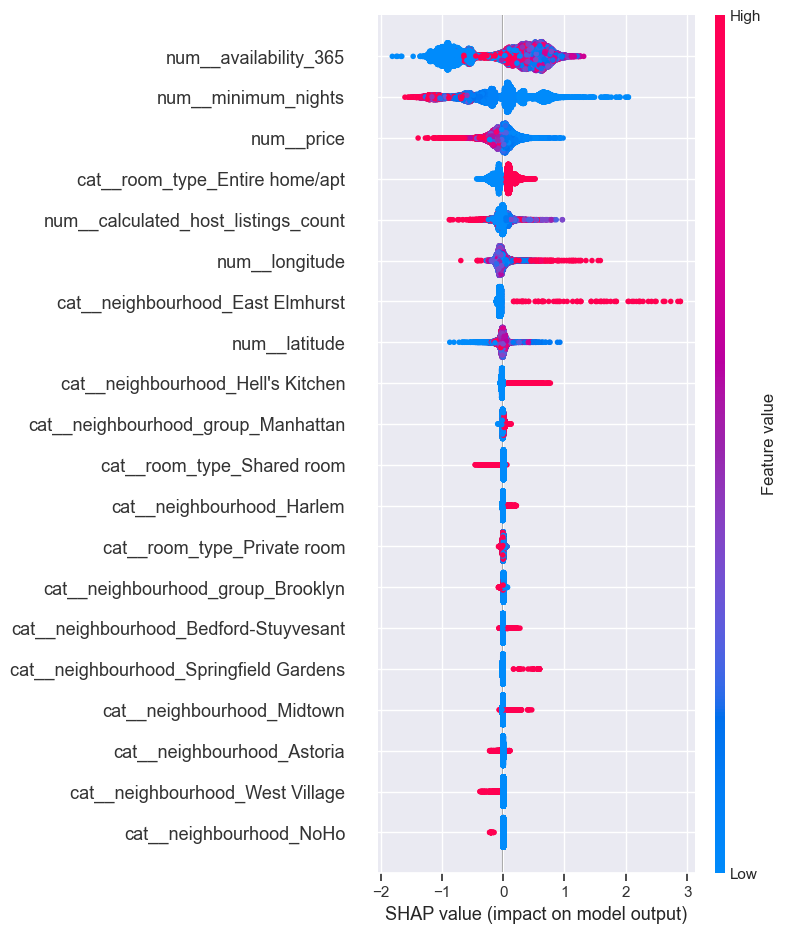

In [30]:

# Pipeline:
pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', LGBMRegressor(n_estimators=100, max_depth=7, num_leaves=120, learning_rate=0.1,
                            random_state=123, verbose=-1, force_row_wise=True))
])
pipeline_lgbm.fit(X_train_non_na, Y_train_non_na)

# X_transformed:
X_transformed = pipeline_lgbm.named_steps['preprocessor'].transform(X_train_non_na)

# Conversion: sparse matrix --> dense numpy array 
X_transformed_dense = X_transformed.toarray()

# Create explainer:
explainer = shap.Explainer(pipeline_lgbm.named_steps['lgbm'], X_transformed_dense)
shap_values = explainer.shap_values(X_transformed_dense)

# Shap Summary Plot:
shap.summary_plot(shap_values, X_transformed_dense, feature_names=pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out())

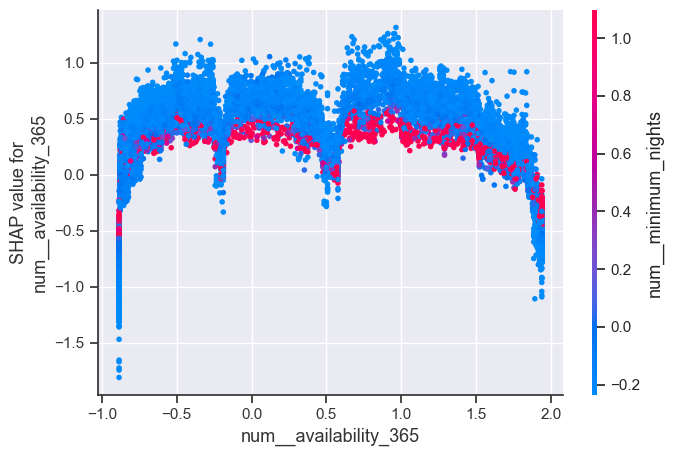

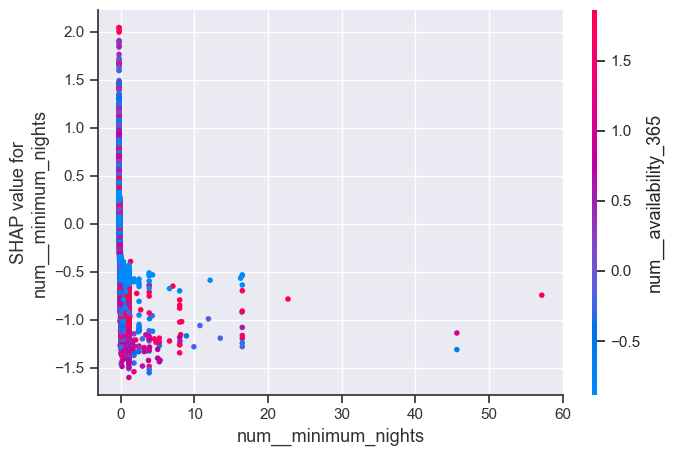

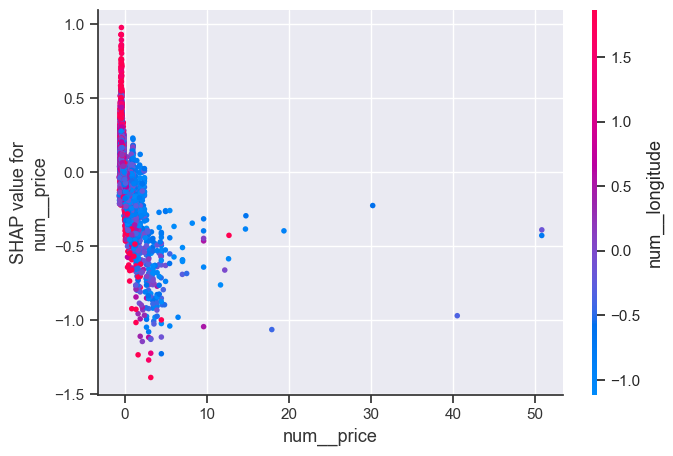

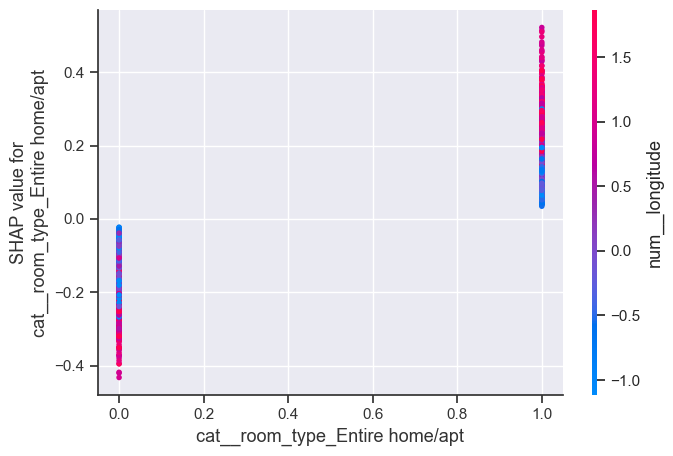

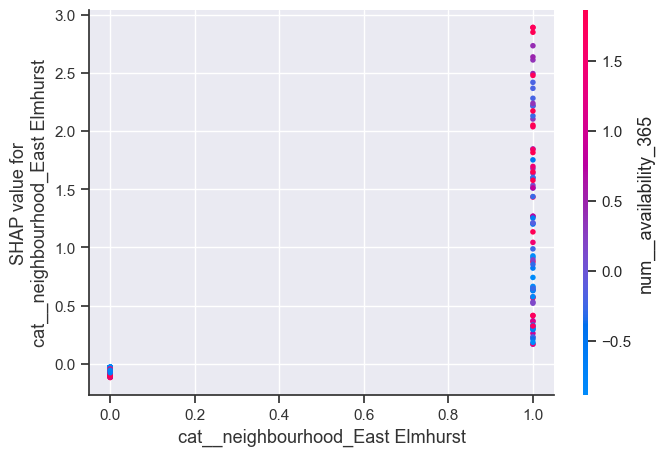

In [31]:
# Generate dependence plots for the following features
important_features = ['num__availability_365', 'num__minimum_nights', 'num__price', 
                      'cat__room_type_Entire home/apt', 'cat__neighbourhood_East Elmhurst']

for feature in important_features:
    shap.dependence_plot(feature, shap_values, X_transformed_dense, 
                         feature_names=pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out())

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

### GOLDEN RULE: REMOVING NaN TARGET EXAMPLES FROM TEST SETS
- Removing examples with NaN target values from the test set ensures that the evaluation of the model's performance is based on known outcomes.
- Since the golden rule emphasizes not using test data in the model building process, removing NaN values from the test set does not violate this rule.
- The decision does not use any information from the test set to inform the model building and is solely aimed at ensuring a meaningful and accurate evaluation.

### RESULTS IN TEST DATA:
- The best R^2 score obtained on the validation set during hyperparameter tuning was 0.3791, while the R^2 score on the test set was slightly lower at 0.3655.
- The model's performance on the test data is consistent with the validation scores, indicating that the model generalizes well to new, unseen data.
- I have a high level of trust in these results as the model’s performance did not drastically drop when applied on the test set, showing a level of robustness.
- It’s unlikely that optimization bias is significant in this case since the model’s performance on the test set was reasonably close to the validation performance. Thus, it seems that the model's complexity is appropriate for the given problem.
- However, a minor level of optimization bias could still be present due to the nature of grid search selecting hyperparameters that perform best on the validation set, which may not always generalize best to unseen data.
- As for the model chosen, given the large number of hyperparameters in LightGBM (e.g., number of leaves, max depth, learning rate, and number of estimators), there is a risk of optimization bias where the model might fit the validation set closely during hyperparameter tuning. But the model still generalized well on test data.

### EXPLANATION OF 2 PREDICTIONS (FORCE PLOT)
In the first plot, the predicted number of reviews per month is 2.78, which is higher than the base value (average prediction) of 1.356.
- num_latitude, num_price, and num_availability_365 are the top three features pushing the prediction higher.
- num_minimum_nights and cat_room_type_Entire home/apt are the two main features lowering the prediction, but their impact is not as strong as the previous features.

In the second plot, the predicted number of reviews per month is 0.21, which is below the base value of 1.356.
- num_price is the most influential feature lowering the prediction.
- Features like num_availability_365, num_minimum_nights, and num_longitude slightly push the prediction higher, but their impact is relatively low compared to the impact of num_price.

In [32]:
# LGBM Regressor Model:
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lgbm', LGBMRegressor(n_estimators=100, max_depth=7, num_leaves=120, learning_rate=0.1,
                            random_state=123, verbose=-1, force_row_wise=True))
])

# Fit on training data:
best_model.fit(X_train_non_na, Y_train_non_na)

# Get non-NaN target test set:
non_na_indices_test = Y_test.notna()

X_test_non_na = X_test[non_na_indices_test]
Y_test_non_na = Y_test[non_na_indices_test]

# Predict on test data
Y_test_pred = best_model.predict(X_test_non_na)

# Calculate R^2 score
r2_test_score = r2_score(Y_test_non_na, Y_test_pred)

print(f"R^2 Score on Test Data: {r2_test_score:.4f}")

R^2 Score on Test Data: 0.3655


In [33]:
# Transform the test set and convert to dense array
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test_non_na)
X_test_transformed_dense = X_test_transformed.toarray()  # conversion to dense array

# Create the SHAP explainer object
explainer = shap.Explainer(best_model.named_steps['lgbm'])

# Compute SHAP values for the dense transformed test set
shap_values = explainer.shap_values(X_test_transformed_dense)

# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], feature_names=best_model.named_steps['preprocessor'].get_feature_names_out())

<!-- END QUESTION -->

<br><br>

In [34]:
# Plot the SHAP values for the second prediction
shap.force_plot(explainer.expected_value, shap_values[1, :], feature_names=best_model.named_steps['preprocessor'].get_feature_names_out())

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

### Concluding Remarks:
  - The LightGBM models, both grid and random searches, demonstrate the highest R^2 scores, suggesting that gradient boosting frameworks are well-suited for the dataset used.
  - Random Forest models also show competitive performance, particularly with a lower standard deviation in R^2, indicating stability in predictions. However, those take way higher computational power.
  - SVM with RBF kernel and k-NN models lag behind in performance compared to ensemble methods, as evidenced by their lower R^2 scores.
  - The linear model with Ridge regularization has the lowest R^2 score, which may indicate either the presence of non-linear relationships in the data or that the model is too simple to capture the complexity of the dataset.

### Potential Improvements:
  - While explored to a limited extent, feature engineering could potentially improve model performance by introducing new informative features or removing noisy ones (e.g., extracting features from titles).
  - Ensemble methods combining different model predictions might capitalize on the strengths of individual models to improve overall performance.
  - Hyperparameter tuning could be expanded; for example, using Bayesian optimization might yield better hyperparameters in a more efficient manner than grid or random searches.
  - Model stacking could be experimented with, especially stacking simpler models like SVM and k-NN with more complex ones, which might boost performance while retaining some interpretability.
  - Given the table results below, further investigation into why certain models like LightGBM outperform others could provide insights into the dataset's characteristics.

In [35]:
# DataFrame creation
df = pd.DataFrame({
    "Model/Search Type": [
        "LightGBM Grid Search",
        "LightGBM Random Search 1",
        "LightGBM Random Search 2",
        "SVM w/ RBF Grid Search",
        "SVM w/ RBF Random Search 1",
        "SVM w/ RBF Random Search 2",
        "Random Forest Random Search 1",
        "Random Forest Random Search 2",
        "k-NN Random Search 1",
        "k-NN Random Search 2",
        "Linear Model Ridge Grid Search"
    ],
    "Best R^2 Score": [
        0.3791,
        0.3724,
        0.3625,
        0.2227,
        0.2197,
        0.2205,
        0.3531,
        0.3487,
        0.1992,
        0.1992,
        0.0984
    ],
    "Std Dev R^2": [
        0.0098,
        0.0043,
        0.0045,
        0.0036,
        0.0019,
        0.0040,
        0.0001,
        0.0002,
        0.0146,
        0.0156,
        0.0103
    ],
    "Best Hyperparameters": [
        "lr: 0.1, depth: 7, est: 100, leaves: 120",
        "lr: 0.154, depth: 7, est: 106, leaves: 145",
        "lr: 0.149, depth: 7, est: 198, leaves: 1830",
        "C: 15",
        "C: 7",
        "C: 30",
        "depth: 20, est: 116",
        "depth: 70, est: 306",
        "neighbors: 29",
        "neighbors: 33",
        "alpha: 46"
    ]
})

# Sort DataFrame by 'Model/Search Type'
df.sort_values(by='Model/Search Type', inplace=True)

# Print the sorted DataFrame
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

+--------------------------------+------------------+---------------+---------------------------------------------+
| Model/Search Type              |   Best R^2 Score |   Std Dev R^2 | Best Hyperparameters                        |
+================================+==================+===============+=============================================+
| LightGBM Grid Search           |           0.3791 |        0.0098 | lr: 0.1, depth: 7, est: 100, leaves: 120    |
+--------------------------------+------------------+---------------+---------------------------------------------+
| LightGBM Random Search 1       |           0.3724 |        0.0043 | lr: 0.154, depth: 7, est: 106, leaves: 145  |
+--------------------------------+------------------+---------------+---------------------------------------------+
| LightGBM Random Search 2       |           0.3625 |        0.0045 | lr: 0.149, depth: 7, est: 198, leaves: 1830 |
+--------------------------------+------------------+---------------+---

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

### The Importance of Understanding Model Complexity:
My key takeaway is the delicate balance between model complexity and generalizability. Initially, there's a misconception that more complex models always perform better. However, the material clearly demonstrates that a model must be complex enough to learn the underlying patterns, yet simple enough to generalize well to unseen data.
### Golden Rule:
The revelation of the "golden rule" of machine learning — not to use test data in the model training process — was quite enlightening. It's a fundamental principle that's easy to overlook in the eagerness to improve model performance, yet it's crucial for ensuring that the model evaluation is valid and reliable.
### Hyperparameters:
The deep dive into hyperparameter optimization illuminated just how critical this step is in fine-tuning model performance. What was surprising was how hyperparameter tuning could inadvertently lead to overfitting if not managed correctly, particularly when optimization is done without proper cross-validation.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)